In [48]:
import os, tf2onnx
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
#from dtaidistance import dtw_visualisation as dtwvis
from utils.crane_dataset import CraneDataset
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import RobustScaler
#from dtaidistance import dtw
from tqdm.notebook import tqdm

In [2]:
train_data_file_path_list = ['safe-boom-40-swing-180-load-40-.csv', 'safe-boom-60-swing-180-load-60-.csv',
                             'safe-boom-70-swing-180-load-100-.csv', 'safe-boom-80-swing-180-load-120-.csv',
                             'unsafe-swing-0-load-70-.csv', 'unsafe-swing-0-load-90-.csv',
                             'unsafe-swing-45-load-70-.csv', 'unsafe-swing-90-load-90-.csv',
                             'unsafe-swing-135-load-50-.csv', 'unsafe-swing-135-load-70-.csv',
                             'unsafe-swing-180-load-70-.csv', 'unsafe-swing-180-load-90-.csv']

# train_data_file_path_list = ['unsafe-swing-0-load-70-.csv', 'unsafe-swing-0-load-90-.csv',
#                              'unsafe-swing-45-load-50-.csv', 'unsafe-swing-45-load-70-.csv',
#                              'unsafe-swing-90-load-70-.csv', 'unsafe-swing-90-load-90-.csv',
#                              'unsafe-swing-135-load-50-.csv', 'unsafe-swing-135-load-70-.csv']
# 
for i, file_path in enumerate(train_data_file_path_list):
    train_data_file_path_list[i] = os.path.join('data', file_path)

In [3]:
val_data_file_path_list = ['safe-boom-50-swing-180-load-50-.csv', 'unsafe-swing-45-load-50-.csv', 'unsafe-swing-90-load-70-.csv',]
# val_data_file_path_list = ['unsafe-swing-180-load-70-.csv', 'unsafe-swing-180-load-90-.csv']

for i, file_path in enumerate(val_data_file_path_list):
    val_data_file_path_list[i] = os.path.join('data', file_path)

#### load dataset

In [4]:
train_dataset_inst = CraneDataset(train_data_file_path_list)
val_dataset_inst = CraneDataset(val_data_file_path_list)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
raw_train_dataset = train_dataset_inst.get_dataset()
raw_val_dataset = val_dataset_inst.get_dataset()

In [6]:
for file_path in train_data_file_path_list:
    file_name = os.path.basename(file_path)
    train_data = raw_train_dataset[file_name][train_dataset_inst.get_data_feature_names()+train_dataset_inst.get_data_target_names()]
    train_data = train_data.to_numpy()
    raw_train_dataset[file_name] = train_data[::10]

In [7]:
for file_path in val_data_file_path_list:
    file_name = os.path.basename(file_path)
    val_data = raw_val_dataset[file_name][val_dataset_inst.get_data_feature_names()+val_dataset_inst.get_data_target_names()]
    val_data = val_data.to_numpy()
    raw_val_dataset[file_name] = val_data[::10]

#### display for raw data(train, validation)

Text(0, 0.5, 'value')

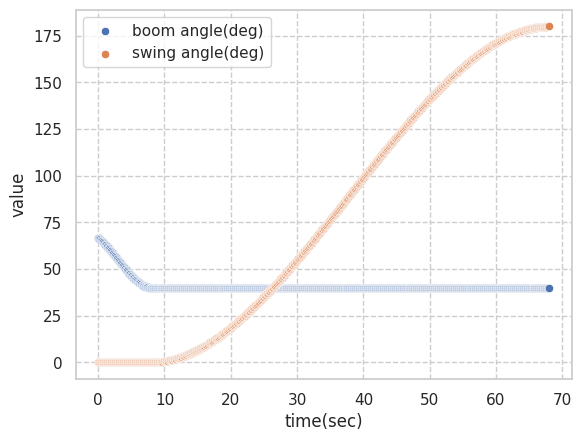

In [8]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (raw_train_dataset[file_name].shape[file_name_index])*0.1, 0.1)

sns.set(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.scatterplot(x=time_arr, y=raw_train_dataset[file_name][:, 0], label='boom angle(deg)')
sns.scatterplot(x=time_arr, y=raw_train_dataset[file_name][:, 1], label='swing angle(deg)')

plt.grid(True)
plt.xlabel('time(sec)')
plt.ylabel('value')

Text(0, 0.5, 'Load(N)')

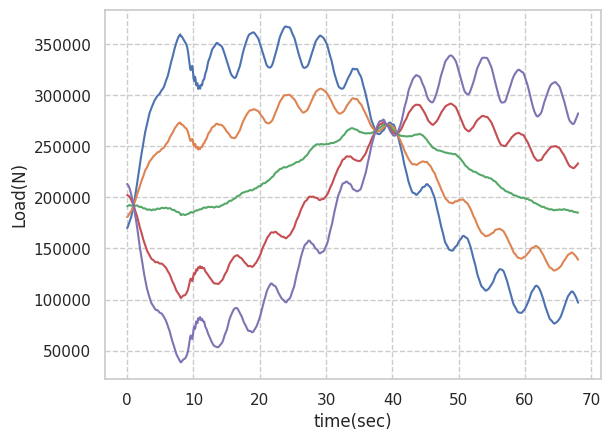

In [9]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (raw_train_dataset[file_name].shape[file_name_index])*0.1, 0.1)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

for i in range(5):
    sns.lineplot(x=time_arr, y=raw_train_dataset[file_name][:, 3+i]) 

plt.xlabel('time(sec)')
plt.ylabel('Load(N)')

Text(0, 0.5, 'Load(N)')

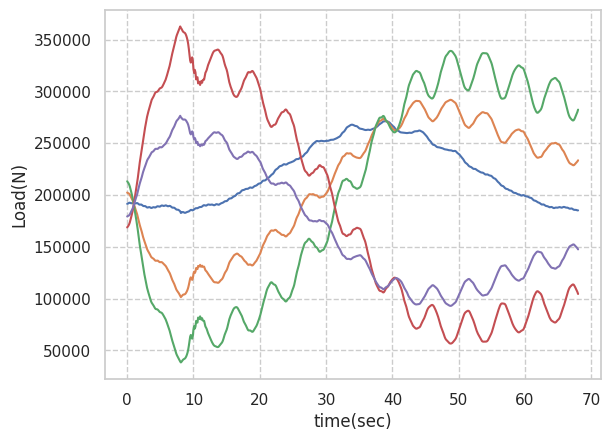

In [10]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (raw_train_dataset[file_name].shape[file_name_index])*0.1, 0.1)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

for i in range(5):
    sns.lineplot(x=time_arr, y=raw_train_dataset[file_name][:, 5+i]) 

plt.xlabel('time(sec)')
plt.ylabel('Load(N)')

Text(0.5, 0, 'angle(deg)')

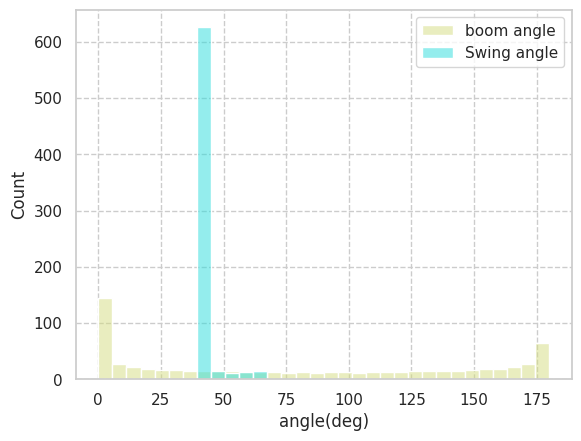

In [11]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
sns.histplot(raw_train_dataset[file_name][:, 0:2], palette='rainbow')
plt.legend(['boom angle', 'Swing angle'])
#plt.xlim(-100, 200)
plt.xlabel('angle(deg)')

Text(0.5, 0, 'Load(N)')

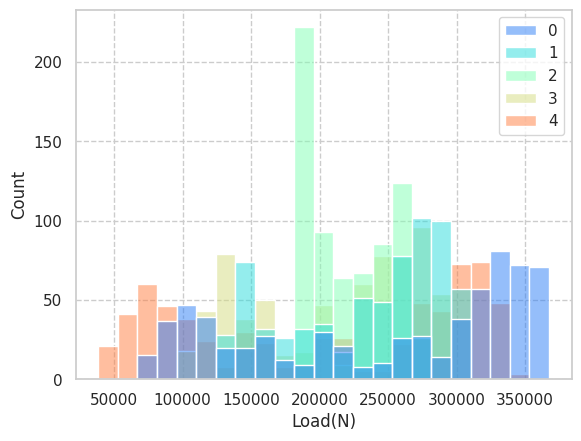

In [12]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(raw_train_dataset[file_name][:, 3:8], palette='rainbow')
plt.xlabel('Load(N)')

Text(0.5, 0, 'Load(N)')

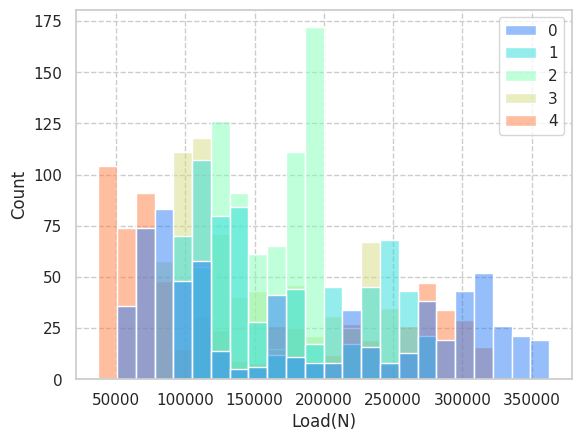

In [13]:
#plt.xlim(-100, 200)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(raw_train_dataset[file_name][:, 8:13], palette='rainbow')
plt.xlabel('Load(N)')

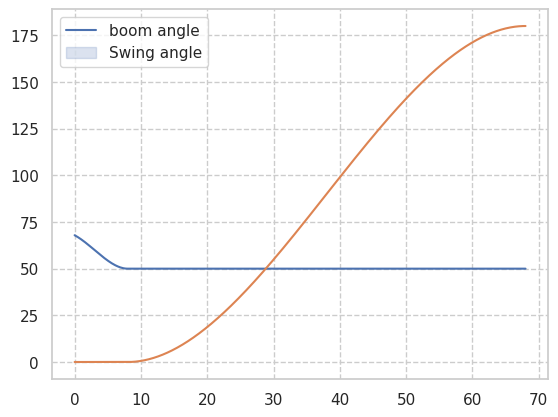

In [14]:
file_name_index = 0
file_name = os.path.basename(val_data_file_path_list[file_name_index])
time_arr = np.arange(0, (raw_val_dataset[file_name].shape[file_name_index])*0.1, 0.1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

for i in range(2):
    sns.lineplot(x=time_arr, y=raw_val_dataset[file_name][:, i])

plt.legend(['boom angle', 'Swing angle'])

Text(0.5, 0, 'Load(N)')

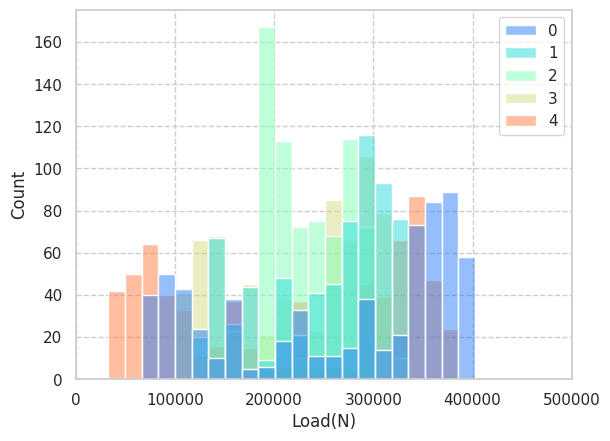

In [15]:
file_name_index = 0
file_name = os.path.basename(val_data_file_path_list[file_name_index])

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(raw_val_dataset[file_name][:, 3:8], palette='rainbow')
plt.xlim(0, 500000)
plt.xlabel('Load(N)')

Text(0.5, 0, 'Load(N)')

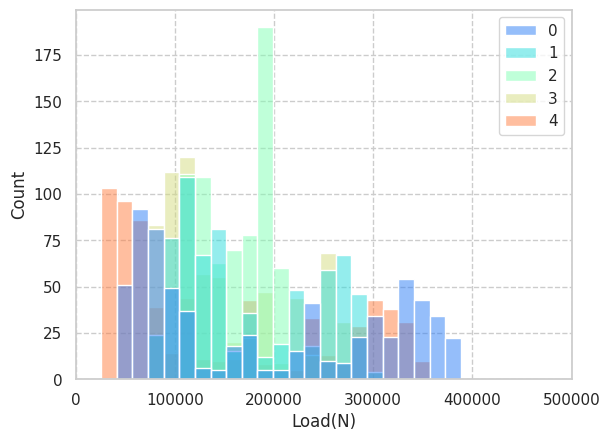

In [16]:
file_name_index = 0
file_name = os.path.basename(val_data_file_path_list[file_name_index])

sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(raw_val_dataset[file_name][:, 8:13], palette='rainbow')
plt.xlim(0, 500000)
plt.xlabel('Load(N)')

#### execute feature engineering

In [17]:
new_train_dataset = dict()

for file_path in train_data_file_path_list:
    file_name = os.path.basename(file_path)
    new_train_dataset[file_name] = np.copy(raw_train_dataset[file_name])
    
    train_grad_boom_angle = np.gradient(new_train_dataset[file_name][:, 0])
    train_grad_swing_angle = np.gradient(new_train_dataset[file_name][:, 1])
    
    train_grad_load_list = []
    
    for i in range(10):
        train_grad_load_list.append(np.gradient(new_train_dataset[file_name][:, 3+i]))
    
    train_grad_angle = np.stack([train_grad_boom_angle, train_grad_swing_angle], axis=1)
    train_grad_load = np.array(train_grad_load_list).T

    new_train_dataset[file_name] = np.hstack([new_train_dataset[file_name][:, 0:3], train_grad_angle, train_grad_load, new_train_dataset[file_name][:, 3:13]]) 

# new data columns: 0:boom angle, 1:swing angle, 2:operation load, 3:grad_boom_angle, 4:grad_swing_angle, 5~14:grad_load(10ea), 15~24: ground load(10ea) 

In [18]:
new_val_dataset = dict()

for file_path in val_data_file_path_list:
    file_name = os.path.basename(file_path)
    new_val_dataset[file_name] = np.copy(raw_val_dataset[file_name])
    
    val_grad_boom_angle = np.gradient(new_val_dataset[file_name][:, 0])
    val_grad_swing_angle = np.gradient(new_val_dataset[file_name][:, 1])
    
    val_grad_load_list = []
    
    for i in range(10):
        val_grad_load_list.append(np.gradient(new_val_dataset[file_name][:, 3+i]))
    
    val_grad_angle = np.stack([val_grad_boom_angle, val_grad_swing_angle], axis=1)
    val_grad_load = np.array(val_grad_load_list).T

    new_val_dataset[file_name] = np.hstack([new_val_dataset[file_name][:, 0:3], val_grad_angle, val_grad_load, new_val_dataset[file_name][:, 3:13]]) 

<Axes: >

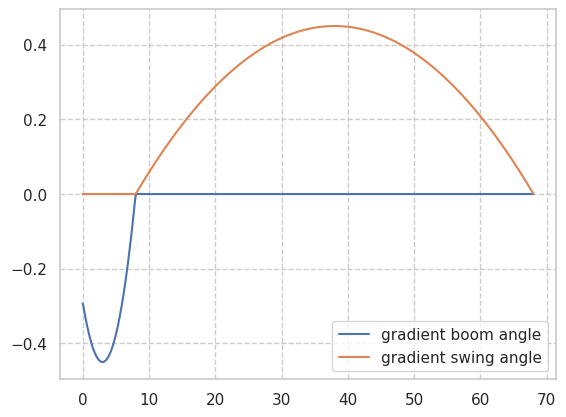

In [19]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (new_train_dataset[file_name].shape[0])*0.1, 0.1)

sns.set_style("whitegrid", {'grid.linestyle': '--'})
#sns.scatterplot(x=time_arr, y=new_train_dataset[file_name][:, 0], label='boom angle')
sns.lineplot(x=time_arr, y=new_train_dataset[file_name][:, 3], label='gradient boom angle')
sns.lineplot(x=time_arr, y=new_train_dataset[file_name][:, 4], label='gradient swing angle')
#plt.ylim(-3, 3)

(-1.0, 1.0)

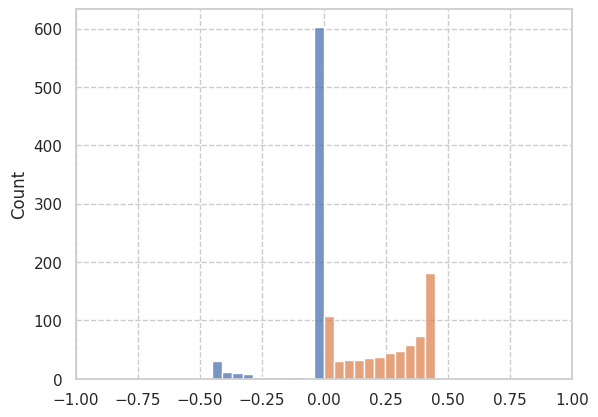

In [20]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(new_train_dataset[file_name][:, 3], label='gradient boom angle')
sns.histplot(new_train_dataset[file_name][:, 4], label='gradient swing angle')
plt.xlim(-1, 1)


<Axes: >

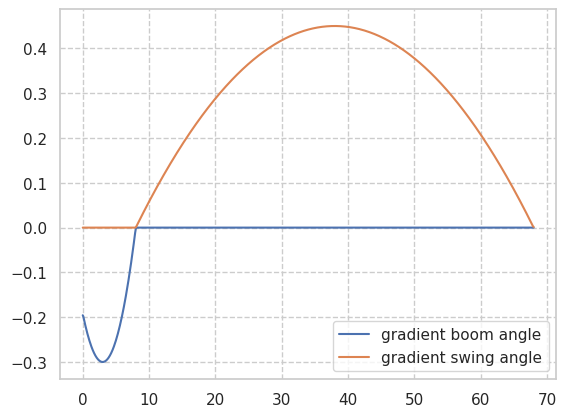

In [21]:
file_name_index = 0
file_name = os.path.basename(val_data_file_path_list[file_name_index])
time_arr = np.arange(0, (new_val_dataset[file_name].shape[0])*0.1, 0.1)

sns.set_style("whitegrid", {'grid.linestyle': '--'})
#sns.scatterplot(x=time_arr, y=new_train_dataset[file_name][:, 0], label='boom angle')
sns.lineplot(x=time_arr, y=new_val_dataset[file_name][:, 3], label='gradient boom angle')
sns.lineplot(x=time_arr, y=new_val_dataset[file_name][:, 4], label='gradient swing angle')

(-6000.0, 6000.0)

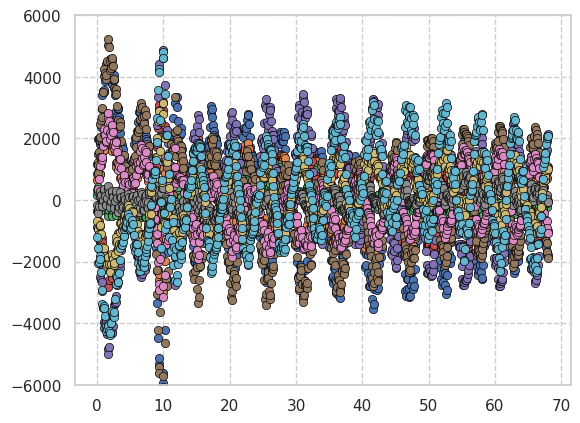

In [22]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (new_train_dataset[file_name].shape[0])*0.1, 0.1)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

for i in range(10):
    sns.scatterplot(x=time_arr, y=new_train_dataset[file_name][:, 5+i], edgecolor='black')

plt.ylim(-6000, 6000)

(-6000.0, 6000.0)

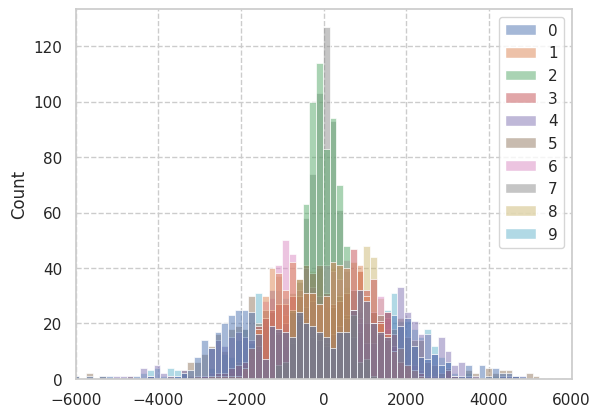

In [23]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (new_train_dataset[file_name].shape[0])*0.1, 0.1)

sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(new_train_dataset[file_name][:, 5:15])
plt.xlim(-6000, 6000)

#### data merge from feature extraction

In [24]:
arr_list = []

for file_path in train_data_file_path_list:
    file_name = os.path.basename(file_path)
    arr_list.append(new_train_dataset[file_name])

new_train_total_data = np.vstack(arr_list)

In [25]:
scaler = RobustScaler().fit(new_train_total_data)

In [26]:
scaled_new_train_dataset = dict()
scaled_new_val_dataset = dict()

for file_path in train_data_file_path_list:
    file_name = os.path.basename(file_path)
    scaled_new_train_dataset[file_name] = scaler.transform(new_train_dataset[file_name])

for file_path in val_data_file_path_list:
    file_name = os.path.basename(file_path)
    scaled_new_val_dataset[file_name] = scaler.transform(new_val_dataset[file_name])

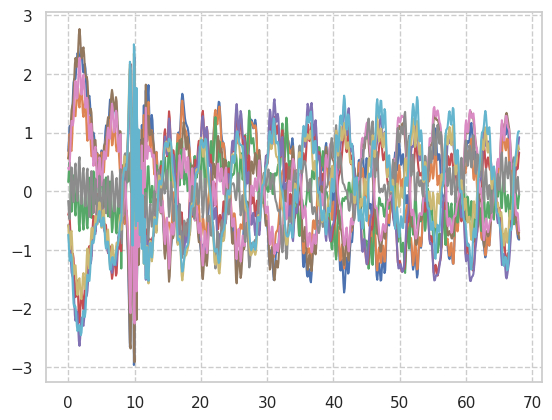

In [27]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (new_train_dataset[file_name].shape[0])*0.1, 0.1)

for i in range(10):
    sns.lineplot(x=time_arr, y=scaled_new_train_dataset[file_name][:, i+5])

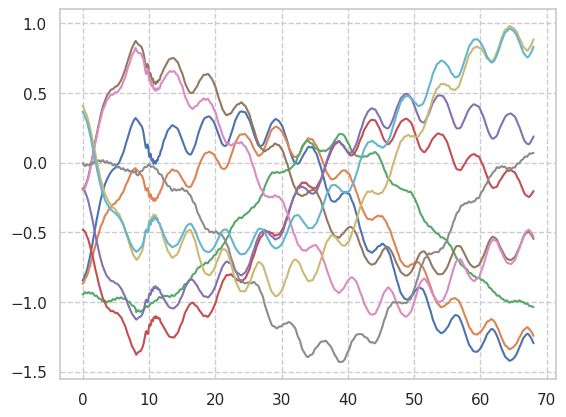

In [28]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])
time_arr = np.arange(0, (scaled_new_train_dataset[file_name].shape[0])*0.1, 0.1)

for i in range(10):
    sns.lineplot(x=time_arr, y=scaled_new_train_dataset[file_name][:, i+15])

<Axes: ylabel='Count'>

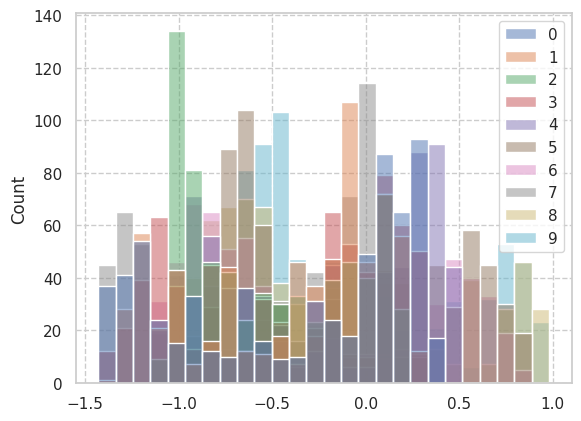

In [29]:
file_name_index = 0
file_name = os.path.basename(train_data_file_path_list[file_name_index])

sns.histplot(scaled_new_train_dataset[file_name][: , 15:])

In [30]:
def create_dataset(data, seq_len=1, pred_distance=1):
    feature, target = [], []
    
    for i in range(data.shape[0] - seq_len - pred_distance -1):
        feature.append(data[i:i+seq_len, 0:15])
        target.append(data[i+seq_len+pred_distance, 15:])
    
    return np.array(feature), np.array(target)

In [31]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
seq_len = 30
pred_distance = 30
n_of_feature = 15
n_of_extra_feature = n_of_feature*2
n_of_output = 10
hidden_size = 500
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)
csv_logger = keras.callbacks.CSVLogger('log.csv', append=True, separator=',')

I0000 00:00:1726647000.025966 1048712 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726647000.050344 1048712 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726647000.050514 1048712 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726647000.052009 1048712 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [32]:
data_len_list = []

for file_path in train_data_file_path_list:
    file_name = os.path.basename(file_path)
    
    data_len_list.append(scaled_new_train_dataset[file_name].shape[0])

batch_size = max(data_len_list)

In [33]:
model_chk_point = keras.callbacks.ModelCheckpoint(filepath='model.keras', monitor="val_loss", verbose=0, save_best_only=True,
                                                  save_weights_only=False, mode="min", save_freq="epoch", initial_value_threshold=None)

In [34]:
def my_lstm(): 
    input_layer = keras.layers.Input(shape=(seq_len, n_of_feature))
    conv_layer = keras.layers.Conv1D(filters=n_of_extra_feature, kernel_size=5, padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))(input_layer)
    #conv_layer = MaxPool1D(pool_size=2)(conv_layer)
    #conv_layer = keras.layers.Conv1D(filters=n_of_extra_feature*2, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01))(conv_layer)
    #conv_layer = MaxPool1D(pool_size=2)(conv_layer)

    lstm_layers = []
    weight_set ={}

    for i in range(n_of_output):
        #lstm_input = keras.layers.MaxPooling1D(pool_size=2)(lstm_input)
        lstm_output = keras.layers.LSTM(units=hidden_size, return_sequences=False, kernel_regularizer=keras.regularizers.l2(0.01), dropout=0.2, name=f'lstm_{i}')(conv_layer)
        #lstm_output = Dense(1, activation='linear')(lstm_output)
        lstm_layers.append(lstm_output)

    concat = keras.layers.concatenate(lstm_layers)
    #output_layer = keras.layers.Dropout(0.2)(concat)
    #output_layer = keras.layers.Dense(int(concat.shape[1]), activation='relu')(concat)
    #output_layer = keras.layers.Dropout(0.2)(output_layer)
    #output_layer = keras.layers.Dense(int(output_layer.shape[1]/2), activation='linear')(output_layer)
    #output_layer = keras.layers.Dropout(0.2)(output_layer)
    #output_layer = keras.layers.Dense(int(output_layer.shape[1]/2), activation='linear')(output_layer)
    #output_layer = keras.layers.Dropout(0.2)(output_layer)
    #output_layer = keras.layers.Dense(int(output_layer.shape[1]/2), activation='linear')(output_layer)
    #output_layer = keras.layers.Dropout(0.2)(output_layer)
    output_layer = keras.layers.Dense(n_of_output, activation='linear')(concat)

    model = keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])
    
    return model
     
        

In [35]:
model = my_lstm()

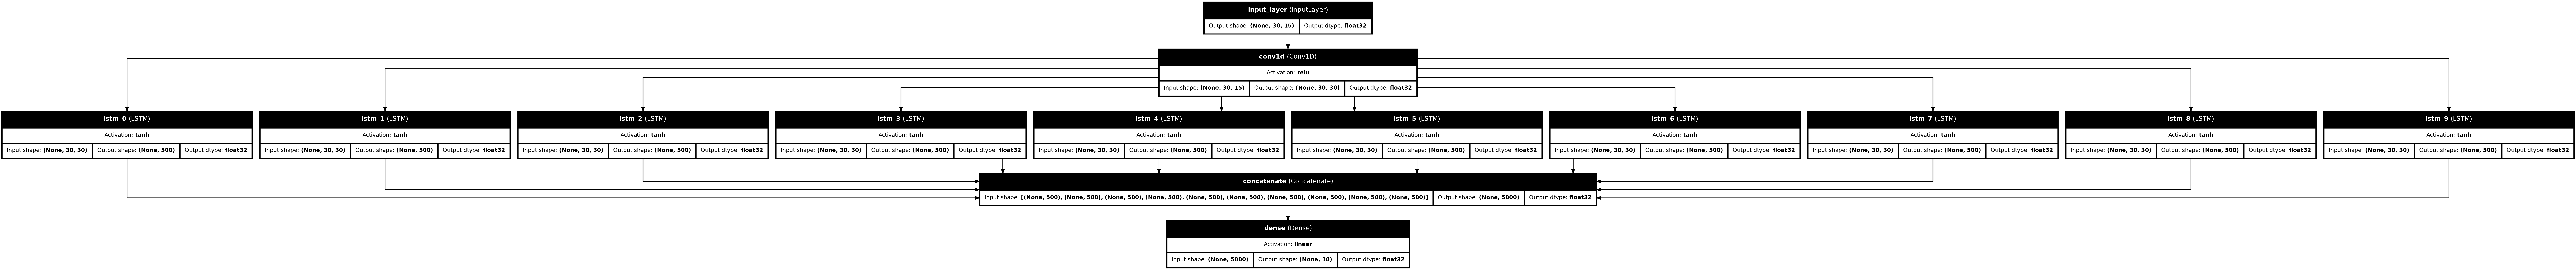

In [36]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_dtype=True)

In [37]:
model_history = None
metric_log = []
epoch = 5

with tqdm(total = epoch*len(train_data_file_path_list)*len(val_data_file_path_list)) as pbar:
    for i in range(epoch):
        for file_path in train_data_file_path_list:
            train_file_name = os.path.basename(file_path)
            
            for file_path in val_data_file_path_list:
                val_file_name = os.path.basename(file_path)

                scaled_x_train, scaled_y_train = create_dataset(data=scaled_new_train_dataset[train_file_name], seq_len=seq_len, pred_distance=pred_distance)
                scaled_x_val, scaled_y_val = create_dataset(data=scaled_new_val_dataset[val_file_name], seq_len=seq_len, pred_distance=pred_distance)
                
                model_history= model.fit(x=scaled_x_train, y=scaled_y_train, validation_data=(scaled_x_val, scaled_y_val), epochs=1, batch_size=10000, verbose=0,
                                               callbacks=[early_stop, csv_logger, model_chk_point])
                pbar.update(1)

        train_loss = model_history.history['loss'][0]
        val_loss = model_history.history['val_loss'][0]
        train_abs_error = model_history.history['mean_absolute_error'][0]
        val_abs_error = model_history.history['val_mean_absolute_error'][0]
        
        metric_log.append(np.array([i, train_loss, val_loss, train_abs_error, val_abs_error]))
        
        print(i, train_loss, val_loss, train_abs_error, val_abs_error)

  0%|          | 0/180 [00:00<?, ?it/s]

2024-09-18 17:10:05.665433: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1726647005.708907 1048824 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647005.731471 1048824 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647005.734618 1048824 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647005.735107 1048824 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647005.735612 1048824 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647005.736114 1048824 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647005.736618 1048824 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647005.737120 1048824 gpu_t

0 5.529749870300293 5.755087852478027 0.4369387626647949 0.43622151017189026
1 4.65337610244751 4.855922698974609 0.3601180911064148 0.3886638581752777
2 3.9310712814331055 4.202823638916016 0.31664103269577026 0.3946925401687622
3 3.32289457321167 3.644625186920166 0.2692940831184387 0.4017440676689148
4 2.8440587520599365 3.1699914932250977 0.28425338864326477 0.41213077306747437


In [47]:
best_model = keras.models.load_model('model.keras')

In [39]:
pred_train_result_list = []
scaled_y_train_list = []

for file_path in train_data_file_path_list:
    file_name = os.path.basename(file_path)
    
    scaled_x_train, scaled_y_train = create_dataset(data=scaled_new_train_dataset[file_name], seq_len=seq_len, pred_distance=pred_distance)
    pred_train_result_list.append(best_model.predict(scaled_x_train))
    scaled_y_train_list.append(scaled_y_train)

pred_train_result_arr = np.vstack(pred_train_result_list)
scaled_y_train_arr = np.vstack(scaled_y_train_list)

pred_val_result_list = []
scaled_y_val_list = []

for file_path in val_data_file_path_list:
    file_name = os.path.basename(file_path)
    
    scaled_x_val, scaled_y_val = create_dataset(data=scaled_new_val_dataset[file_name], seq_len=seq_len, pred_distance=pred_distance)
    pred_val_result_list.append(best_model.predict(scaled_x_val))
    scaled_y_val_list.append(scaled_y_val)
    
pred_val_result_arr = np.vstack(pred_val_result_list)
scaled_y_val_arr = np.vstack(scaled_y_val_list)

18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

W0000 00:00:1726647063.673911 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.674535 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.677865 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.678347 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.678810 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.679263 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.679744 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.680211 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647063.680665 1048820 gp

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
13/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

W0000 00:00:1726647064.413342 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.413892 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.414332 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.414791 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.415224 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.415632 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.416054 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.416472 1048817 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.416877 1048817 gp

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


W0000 00:00:1726647064.850537 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.851004 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.851418 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.851831 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.852239 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.852635 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.853047 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.853455 1048819 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647064.853855 1048819 gp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


W0000 00:00:1726647065.079945 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.080416 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.080812 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.081210 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.081604 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.081981 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.082374 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.082763 1048811 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.083140 1048811 gp

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

W0000 00:00:1726647065.375204 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.375682 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.376106 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.376523 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.376929 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.377337 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.377751 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.378166 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.378582 1048820 gp

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


W0000 00:00:1726647065.576693 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.577152 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.577602 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.578033 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.578445 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.578869 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.579307 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.579721 1048821 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.580134 1048821 gp

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


W0000 00:00:1726647065.869105 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.869565 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.869990 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.870405 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.870809 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.871211 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.871632 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.872042 1048820 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726647065.872440 1048820 gp

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [40]:
y_train_pred = scaler.inverse_transform(np.hstack([np.zeros(shape=(pred_train_result_arr.shape[0], n_of_feature)), pred_train_result_arr]))
y_train_pred = y_train_pred[:, 15:]

y_val_pred = scaler.inverse_transform(np.hstack([np.zeros(shape=(pred_val_result_arr.shape[0], n_of_feature)), pred_val_result_arr]))
y_val_pred = y_val_pred[:, 15:]

y_train = scaler.inverse_transform(np.hstack([np.zeros(shape=(pred_train_result_arr.shape[0], n_of_feature)), scaled_y_train_arr]))
y_train = y_train[:, 15:]

y_val = scaler.inverse_transform(np.hstack([np.zeros(shape=(pred_val_result_arr.shape[0], n_of_feature)), scaled_y_val_arr]))
y_val = y_val[:, 15:]

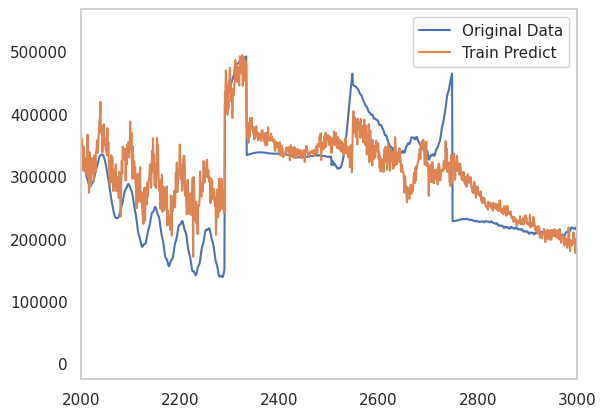

In [41]:
train_load_index = 0
sns.lineplot(y_train[:, train_load_index], label='Original Data')
sns.lineplot(y_train_pred[:, train_load_index], label='Train Predict')
plt.xlim(2000, 3000)
plt.grid()
plt.legend()
plt.show()

In [42]:
print(r2_score(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_percentage_error(y_train, y_train_pred))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
#print(dtw.distance(y_train[:, 0], y_train_pred[:, 0]))

0.7035454070412517
32408.77350943974
0.22663339339055258
43322.39029795901


In [45]:
#dtw_path = dtw.warping_path(y_train[:, 0], y_train_pred[:, 0])
#dtwvis.plot_warping(y_train[:, 0], y_train_pred[:, 0], dtw_path)

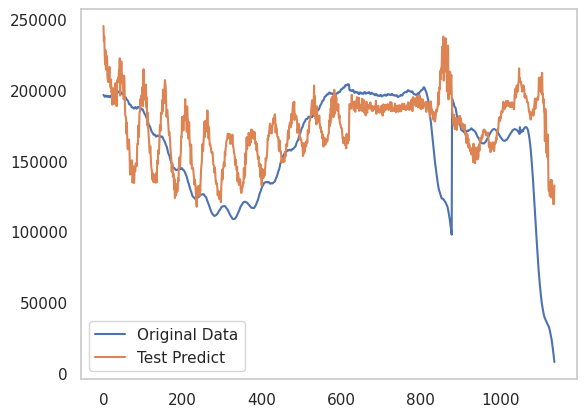

In [43]:
val_load_index = 7
sns.set(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.lineplot(y_val[:, val_load_index], label='Original Data')
sns.lineplot(y_val_pred[:, val_load_index],  label='Test Predict')
#plt.xlim(0, 500)
plt.grid()
plt.legend()
plt.show()

In [44]:
print(r2_score(y_val, y_val_pred))
print(mean_absolute_error(y_val, y_val_pred))
print(mean_absolute_percentage_error(y_val, y_val_pred))
print(np.sqrt(mean_squared_error(y_val, y_val_pred)))
#print(dtw.distance(y_val[:, 0], y_val_pred[:, 0]))

0.3661046615370978
39765.93929557699
0.3476743238696271
55076.41472525851


In [48]:
#dtw_path = dtw.warping_path(y_val[:, 0], y_val_pred[:, 0])
#dtwvis.plot_warping(y_val[:, 0], y_val_pred[:, 0], dtw_path)

<Axes: xlabel='Epoch', ylabel='Loss'>

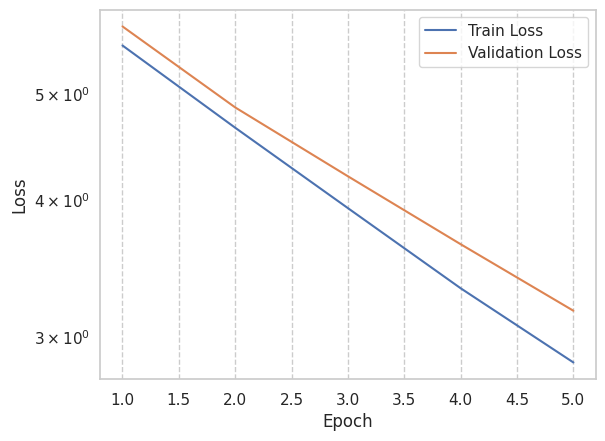

In [45]:
sns.set(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')

metric_log_arr = np.vstack(metric_log)
train_loss_arr = metric_log_arr[:, 1]
val_loss_arr = metric_log_arr[:, 2]
epoch_arr = metric_log_arr[:, 0]+1

sns.lineplot(x=epoch_arr, y=train_loss_arr, label='Train Loss')
sns.lineplot(x=epoch_arr, y=val_loss_arr, label='Validation Loss')

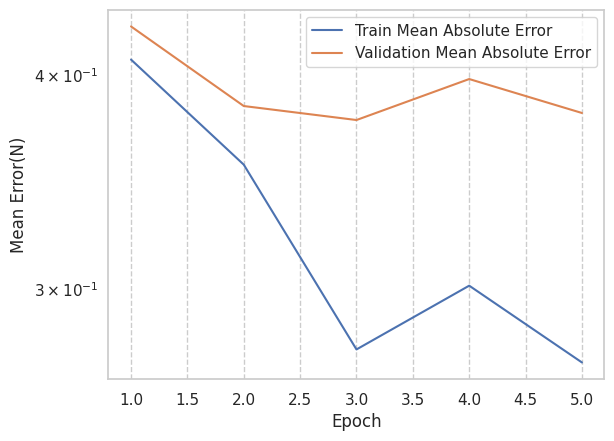

In [47]:
sns.set(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.xlabel('Epoch')
plt.ylabel('Mean Error(N)')

epoch_arr = metric_log_arr[:, 0]+1
train_abs_error_arr = metric_log_arr[:, 3]
val_abs_error_arr = metric_log_arr[:, 4]

sns.lineplot(x=epoch_arr, y=train_abs_error_arr, label='Train Mean Absolute Error')
sns.lineplot(x=epoch_arr, y=val_abs_error_arr, label='Validation Mean Absolute Error')
plt.yscale('log')

In [49]:
spec = (tf.TensorSpec(best_model.inputs[0].shape, tf.float32, name='input'), )
onnx_model, _ = tf2onnx.convert.from_keras(best_model, input_signature=spec)


I0000 00:00:1726648136.167282 1048712 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726648136.167419 1048712 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-09-18 17:28:56.167487: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
I0000 00:00:1726648136.167832 1048712 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726648136.167928 1048712 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so

In [50]:
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())